# Network Visualization - Verbal fluency data: animals

## I. Data preparation

In [2]:
# load libraries
library(igraph)
library(scales)
library(lmSupport)
library(beepr)
library(RColorBrewer)
library(qgraph)

Warning message:
"package 'igraph' was built under R version 3.5.2"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'beepr' was built under R version 3.5.3"Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"Warning message:
"package 'qgraph' was built under R version 3.5.3"

In [4]:
# Read in "animal" data
nodes <- read.csv("data/animal/animals_min5_directed_Nodes.csv", header=T, as.is=T)
links <- read.csv("data/animal/c05_st_red_anim_min5_dir_edges.csv", header=T, as.is=T)

In [5]:
# Examine the data:
head(nodes)
head(links)

Id,Label,Eigenvector.Centrality,Modularity.Class,Eccentricity,Closeness.Centrality,Betweenness.Centrality,In.Degree,Out.Degree,Degree,Weighted.Degree,Weighted.In.Degree,Weighted.Out.Degree,Authority,Hub,Clustering.Coefficient,Weighted.Clustering.Coefficient,Strenght
aardvark,aardvark,0.3608073,0,3,1.904762,63.89300,39,43,82,166,59,107,0.003955696,0.003955696,0.6161202,0.3911944,166
allig,allig,0.7445333,1,3,1.721088,1306.30769,97,89,186,767,388,379,0.009691455,0.009691455,0.3342222,0.1738891,767
ant,ant,0.4742405,23,3,1.891156,747.47158,59,51,110,221,106,115,0.005933544,0.005933544,0.3964167,0.2126282,221
anteat,anteat,0.3467267,0,3,1.894558,84.14831,37,49,86,153,73,80,0.003757911,0.003757911,0.5600198,0.3255286,153
antelop,antelop,0.7801923,2,3,1.721088,1037.54843,93,92,185,1098,557,541,0.009295886,0.009295886,0.3821393,0.1924670,1098
armadillo,armadillo,0.3587843,0,3,1.925170,161.75615,40,43,83,124,62,62,0.004054589,0.004054589,0.4774705,0.2762589,124


from,to,type,weight
aardvark,allig,Directed,1
aardvark,ant,Directed,7
aardvark,anteat,Directed,7
aardvark,antelop,Directed,2
aardvark,armadillo,Directed,2
aardvark,baboon,Directed,2


In [6]:
# Converting the data to an igraph object
# Arguments:
# - d = edges (links)
# - vertices = nodes
# - directed = True (if directed graph)
net <- graph_from_data_frame(d=links, vertices=nodes, directed=T) 
is_weighted(net) # check if is weigthed

[1] TRUE

In [8]:
# Examine the resulting object
class(net)
net 

[1] "igraph"

IGRAPH 4bbc365 DNW- 295 9817 -- 
+ attr: name (v/c), Label (v/c), Eigenvector.Centrality (v/n),
| Modularity.Class (v/n), Eccentricity (v/n), Closeness.Centrality
| (v/n), Betweenness.Centrality (v/n), In.Degree (v/n), Out.Degree
| (v/n), Degree (v/n), Weighted.Degree (v/n), Weighted.In.Degree (v/n),
| Weighted.Out.Degree (v/n), Authority (v/n), Hub (v/n),
| Clustering.Coefficient (v/n), Weighted.Clustering.Coefficient (v/n),
| Strenght (v/n), type (e/c), weight (e/n)
+ edges from 4bbc365 (vertex names):
[1] aardvark->allig     aardvark->ant       aardvark->anteat   
[4] aardvark->antelop   aardvark->armadillo aardvark->baboon   
+ ... omitted several edges

The description of an igraph object is: *IGRAPH 2913da7 DN-- 295 9817 --*  
  
**Description**:
 - D or U, for a directed or undirected graph
 - N for a named graph (where nodes have a `name` attribute)
 - W for a weighted graph (where edges have a `weight` attribute)
 - B for a bipartite (two-mode) graph (where nodes have a `type` attribute)
 - The two numbers that follow (295 9817) refer to the number of nodes and edges in the graph.
 - The description also lists node & edge attributes

In [9]:
# We can access the nodes, edges, and their attributes:
E(net) # edges
V(net) # vertices
print("Attributes edges")
head(E(net)$type) # attributes edges
print("Attributes vertex")
head(V(net)$name) # attributes vertex 

+ 9817/9817 edges from 4bbc365 (vertex names):
 [1] aardvark->allig     aardvark->ant       aardvark->anteat   
 [4] aardvark->antelop   aardvark->armadillo aardvark->baboon   
 [7] aardvark->badger    aardvark->bat       aardvark->bear     
[10] aardvark->beaver    aardvark->buffalo   aardvark->camel    
[13] aardvark->canari    aardvark->cat       aardvark->cheetah  
[16] aardvark->chicken   aardvark->chipmunk  aardvark->cow      
[19] aardvark->coyot     aardvark->crocodil  aardvark->deer     
[22] aardvark->dog       aardvark->eleph     aardvark->elk      
[25] aardvark->fish      aardvark->fox       aardvark->frog     
[28] aardvark->goat      aardvark->hors      aardvark->kangaroo 
+ ... omitted several edges

+ 295/295 vertices, named, from 4bbc365:
  [1] aardvark      allig         ant           anteat        antelop      
  [6] armadillo     baboon        badger        bat           bear         
 [11] beaver        buffalo       camel         canari        cat          
 [16] cheetah       chicken       chipmunk      cow           coyot        
 [21] crocodil      deer          dog           eleph         elk          
 [26] fish          fox           frog          goat          hors         
 [31] kangaroo      lion          llama         monkei        octopus      
 [36] ostrich       rabbit        raccoon       sheep         snak         
 [41] tiger         turkei        whale         zebra         bird         
 [46] boa           bull          chameleon     chimp         cougar       
+ ... omitted several vertices

[1] "Attributes edges"


[1] "Directed" "Directed" "Directed" "Directed" "Directed" "Directed"

[1] "Attributes vertex"


[1] "aardvark"  "allig"     "ant"       "anteat"    "antelop"   "armadillo"

In [10]:
# To access specific nodes and edges by attribute
V(net)[name=="aardvark"]
E(net)[type=="Directed"]

+ 1/295 vertex, named, from 4bbc365:
[1] aardvark

+ 9817/9817 edges from 4bbc365 (vertex names):
 [1] aardvark->allig     aardvark->ant       aardvark->anteat   
 [4] aardvark->antelop   aardvark->armadillo aardvark->baboon   
 [7] aardvark->badger    aardvark->bat       aardvark->bear     
[10] aardvark->beaver    aardvark->buffalo   aardvark->camel    
[13] aardvark->canari    aardvark->cat       aardvark->cheetah  
[16] aardvark->chicken   aardvark->chipmunk  aardvark->cow      
[19] aardvark->coyot     aardvark->crocodil  aardvark->deer     
[22] aardvark->dog       aardvark->eleph     aardvark->elk      
[25] aardvark->fish      aardvark->fox       aardvark->frog     
[28] aardvark->goat      aardvark->hors      aardvark->kangaroo 
+ ... omitted several edges

In [11]:
# To extract an edge list or a matrix back from the igraph networks:
head(as_edgelist(net, names=T))
head(as_adjacency_matrix(net, attr="weight"))

aardvark,allig
aardvark,ant
aardvark,anteat
aardvark,antelop
aardvark,armadillo
aardvark,baboon


[1] 0 2 6 1 3 2

In [12]:
# To extract data frames describing nodes and edges:
head(as_data_frame(net, what="edges"))
head(as_data_frame(net, what="vertices"))

from,to,type,weight
aardvark,allig,Directed,1
aardvark,ant,Directed,7
aardvark,anteat,Directed,7
aardvark,antelop,Directed,2
aardvark,armadillo,Directed,2
aardvark,baboon,Directed,2


,name,Label,Eigenvector.Centrality,Modularity.Class,Eccentricity,Closeness.Centrality,Betweenness.Centrality,In.Degree,Out.Degree,Degree,Weighted.Degree,Weighted.In.Degree,Weighted.Out.Degree,Authority,Hub,Clustering.Coefficient,Weighted.Clustering.Coefficient,Strenght
aardvark,aardvark,aardvark,0.3608073,0,3,1.904762,63.89300,39,43,82,166,59,107,0.003955696,0.003955696,0.6161202,0.3911944,166
allig,allig,allig,0.7445333,1,3,1.721088,1306.30769,97,89,186,767,388,379,0.009691455,0.009691455,0.3342222,0.1738891,767
ant,ant,ant,0.4742405,23,3,1.891156,747.47158,59,51,110,221,106,115,0.005933544,0.005933544,0.3964167,0.2126282,221
anteat,anteat,anteat,0.3467267,0,3,1.894558,84.14831,37,49,86,153,73,80,0.003757911,0.003757911,0.5600198,0.3255286,153
antelop,antelop,antelop,0.7801923,2,3,1.721088,1037.54843,93,92,185,1098,557,541,0.009295886,0.009295886,0.3821393,0.1924670,1098
armadillo,armadillo,armadillo,0.3587843,0,3,1.925170,161.75615,40,43,83,124,62,62,0.004054589,0.004054589,0.4774705,0.2762589,124


## II. Ploting experimentation

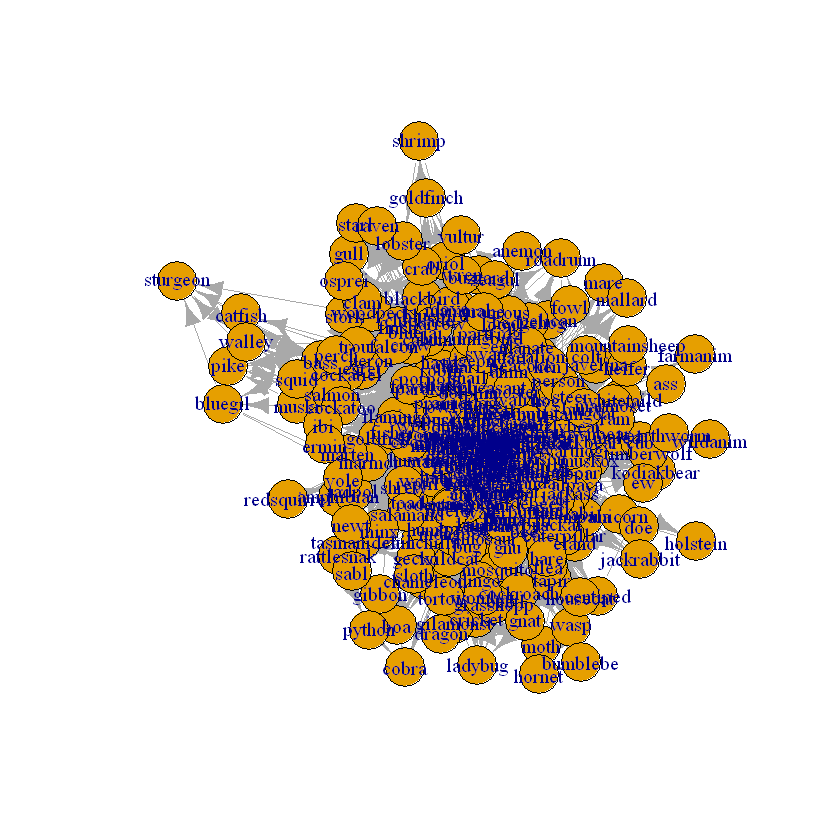

In [13]:
# First raw plot
plot(net)

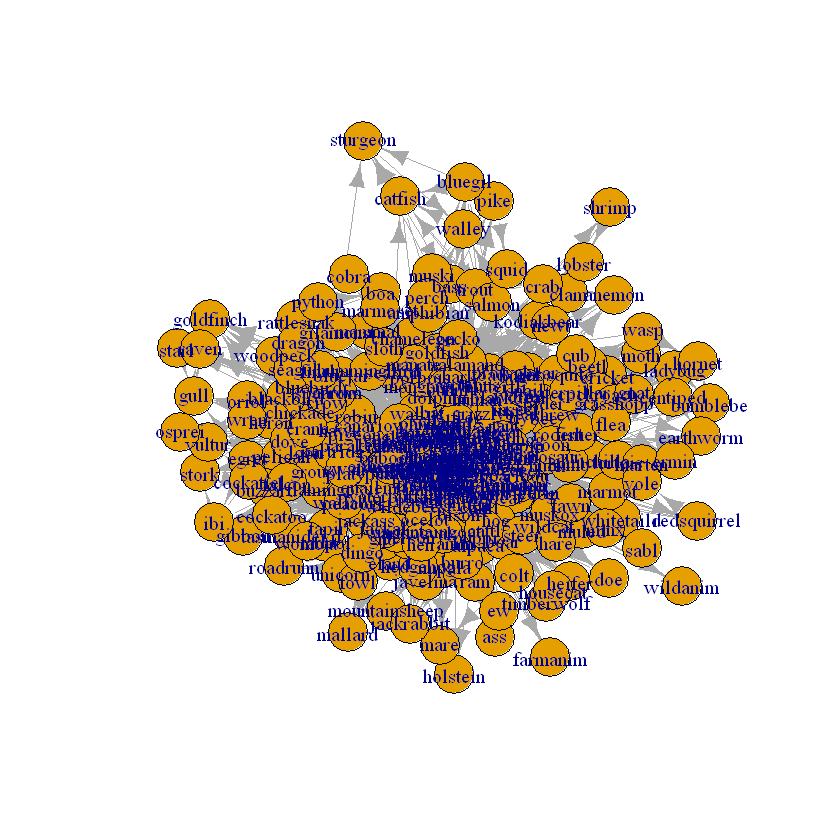

In [14]:
# Simplified network removing loops and multiple edges between two nodes
et.s <- simplify(net, remove.multiple = T, remove.loops = T, edge.attr.comb=c(weight="sum", type="ignore"))
plot(net.s)

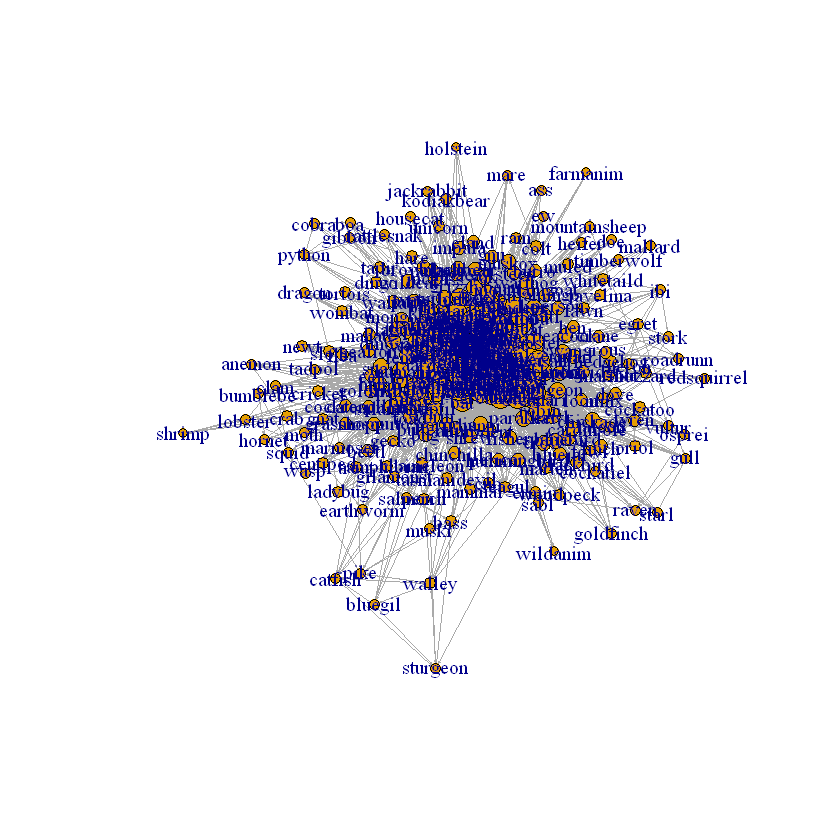

In [15]:
# Compute node degrees (#links) and use that to set node size:
deg <- degree(net.s, mode="all")
deg <- rescale(deg, to = c(4, 20)) # resize node zies between 4-20
V(net.s)$size <- deg
plot(net.s, edge.arrow.size=.1) # reduce arrow size

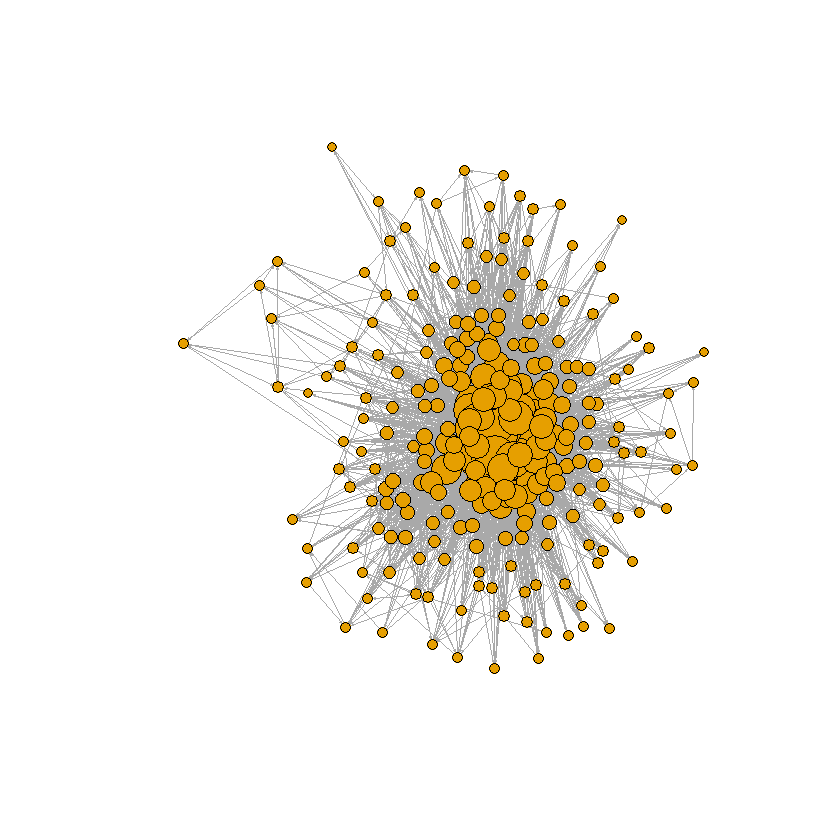

In [16]:
# Let's remove labels from the graph to see how it looks
plot(net.s, edge.arrow.size=.1,vertex.label=NA)

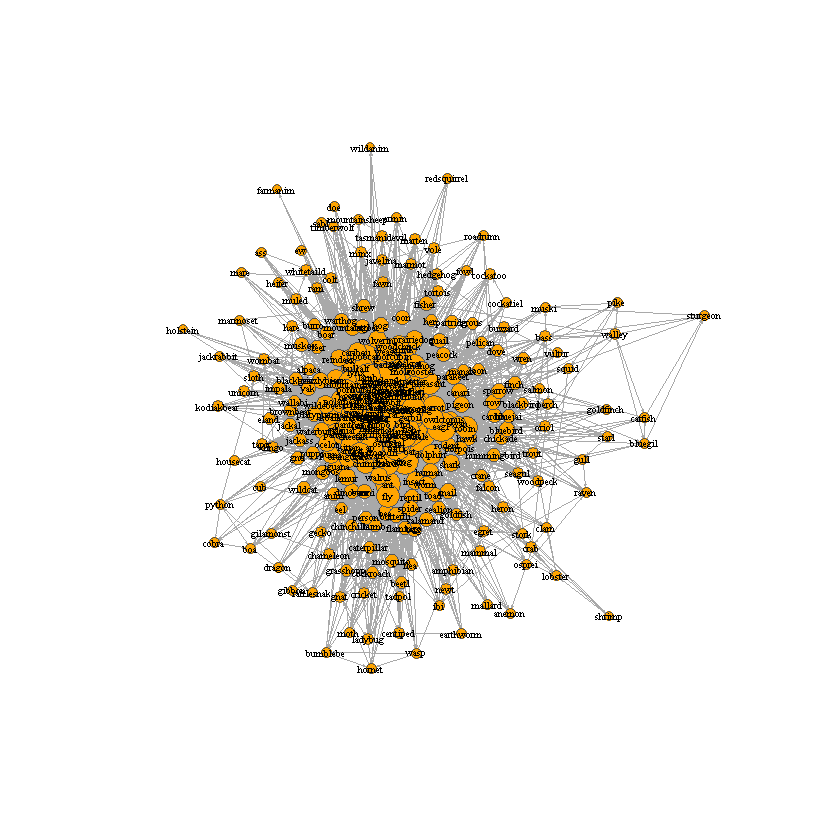

In [17]:
# Let's reduce arrow size, put labels back, and reuce label size 
plot(net.s, edge.arrow.size=.1, vertex.color="orange", 
     vertex.frame.color="#555555",vertex.label=V(net)$name, 
     vertex.label.color="black", vertex.label.cex=.5)

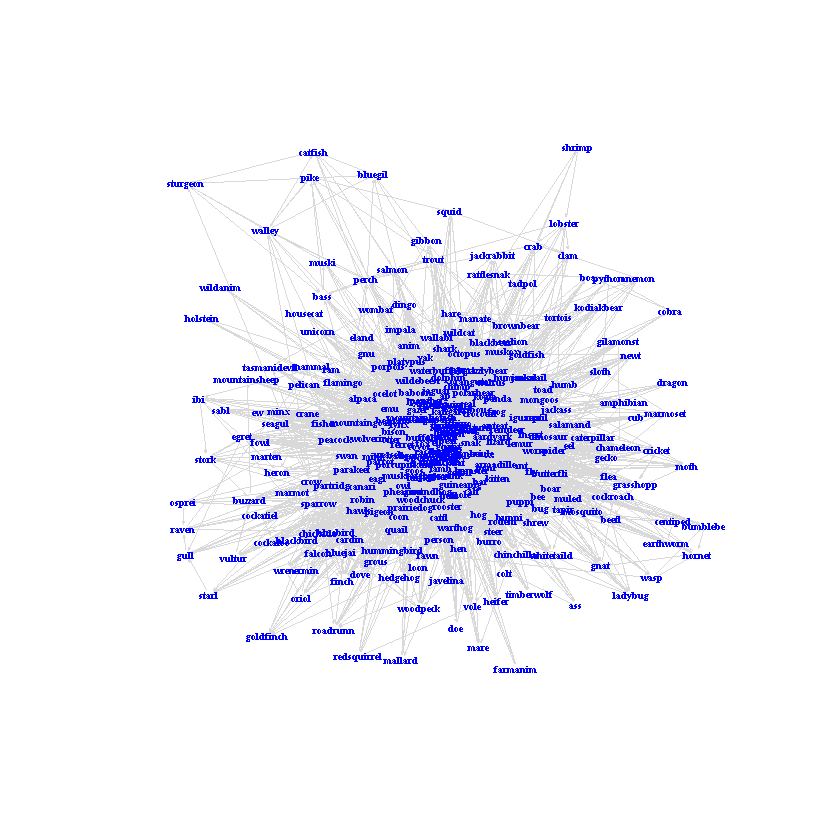

In [18]:
# Let's try removing the vertex shape (circles), changing labels to blue
plot(net.s, vertex.shape="none", vertex.label=V(net)$name, 
     vertex.label.font=2, vertex.label.color="blue",
     vertex.label.cex=.5, edge.arrow.size=.1,
     edge.color="gray85")

In [17]:
# Let's try differnet layouts by using the layout plot function:
# ?igraph::layout_ To check all layouts

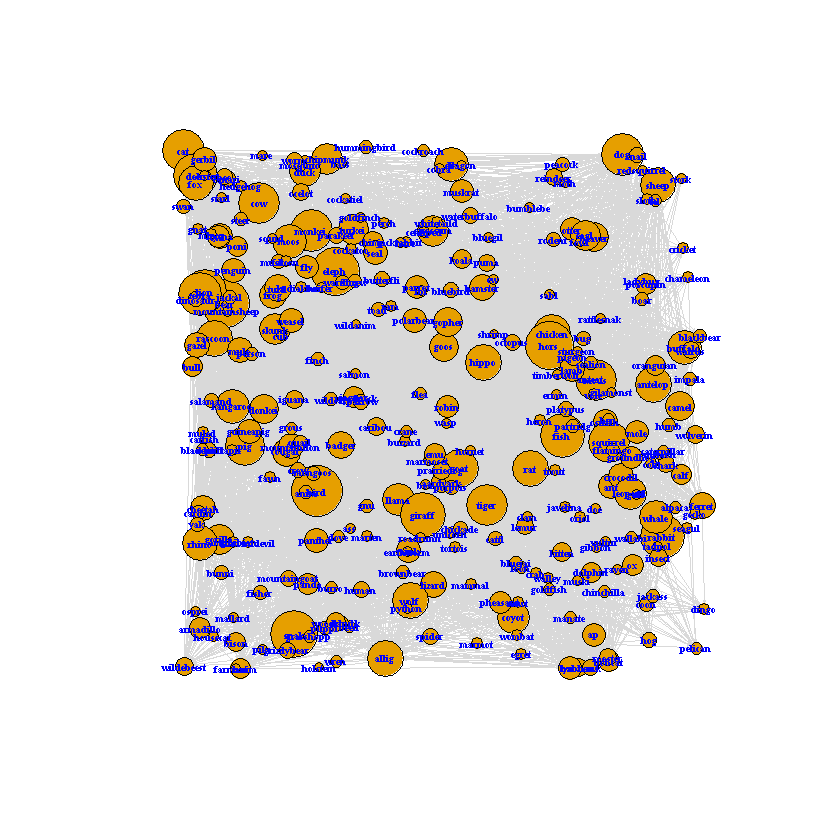

In [19]:
# randomly placed vertices
plot(net.s, vertex.label=V(net)$name, vertex.label.font=2, 
     vertex.label.color="blue", vertex.label.cex=.5, 
     edge.arrow.size=.1, edge.color="gray85",layout=layout_randomly)

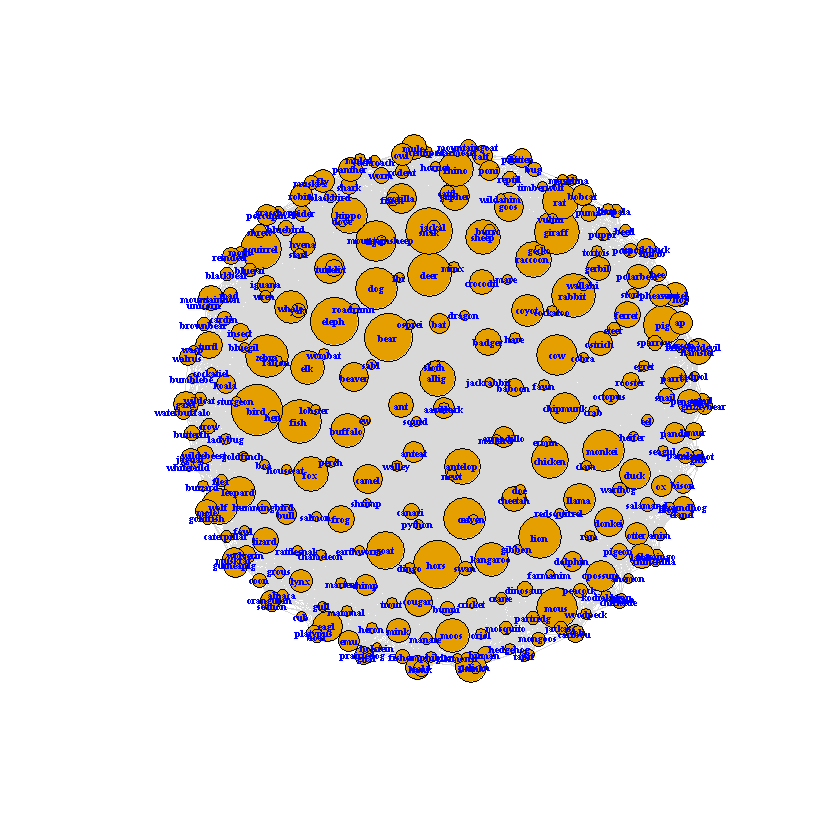

In [20]:
# 3D sphere layout
plot(net.s, vertex.label=V(net)$name, vertex.label.font=2, 
     vertex.label.color="blue",vertex.label.cex=.5, 
     edge.arrow.size=.1, edge.color="gray85", layout=layout_on_sphere)

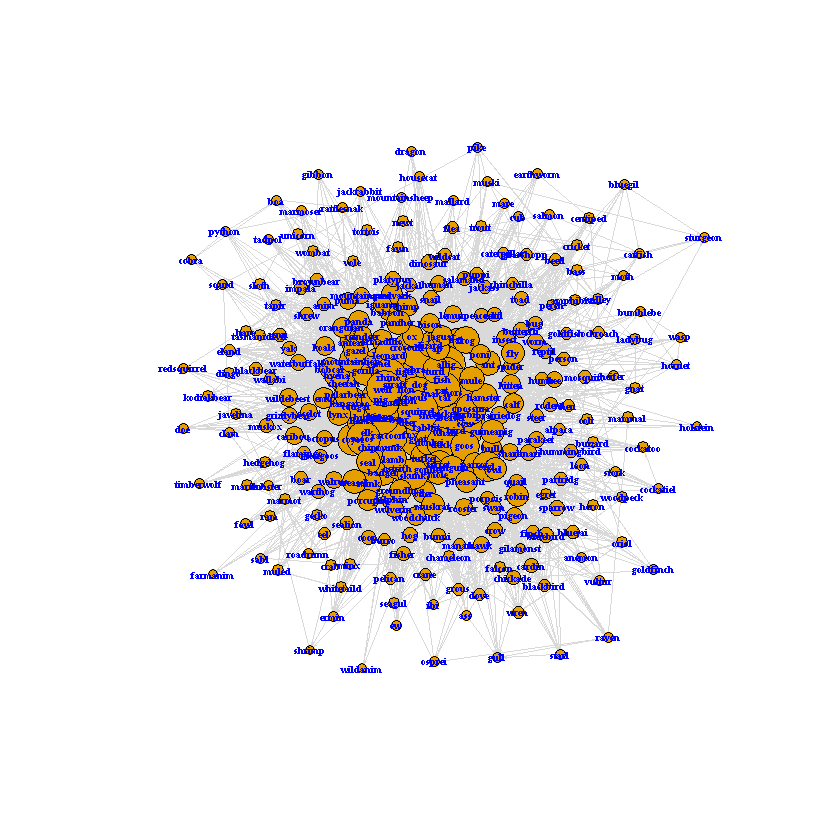

In [21]:
#lgl layout works better with big-dense networks
plot(net.s, vertex.label=V(net)$name, vertex.label.font=2, 
     vertex.label.color="blue",vertex.label.cex=.5, 
     edge.arrow.size=.1, edge.color="gray85", layout=layout_with_lgl)

# III. Highlighting aspects of the network

,vars,n,mean,sd,median,min,max,skew,kurtosis
X1,1,9817,4.91,24.95,1,1,1467,32.35,1516.69


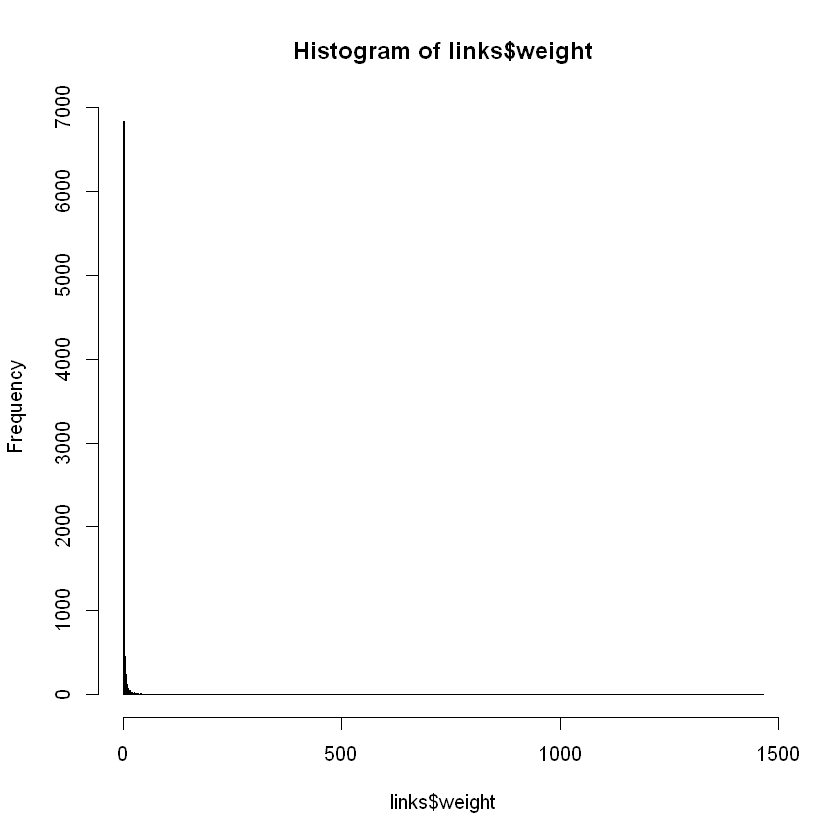

In [22]:
# Lte's look at the weights' distribution
hist(links$weight, breaks=seq(1, max(links$weight)))
varDescribe(links$weight) # describe weights
# Problem: we have way too many links and super skeweed

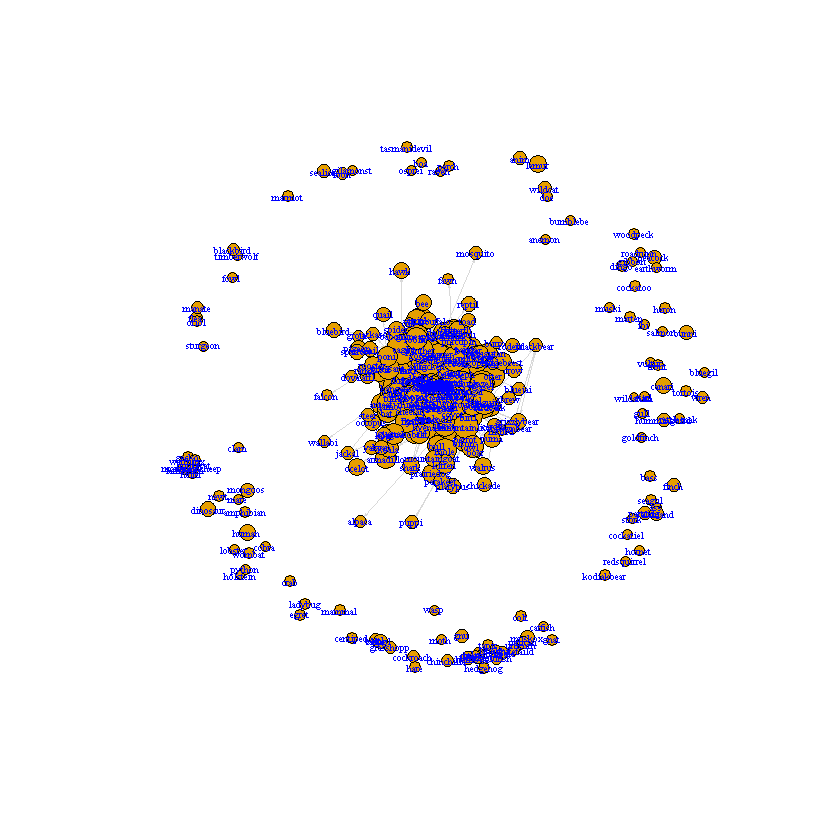

In [23]:
# To help to visualize the network, we are going to trim all the edges with N# of connections below the mean
cut.off <- mean(links$weight) 
net.sp <- delete_edges(net.s, E(net.s)[weight<cut.off])
plot(net.sp, vertex.label.color="blue", vertex.label.cex=0.5, 
     edge.arrow.size=0.1, edge.color="gray85",layout=layout_with_kk) 

### Community detection algorithms 
We are going to try to make the network map more useful by showing the communities within it.
Community detection (by optimizing modularity over partitions) may take a long with hundres of edgeds and vertices  
A few common options: 
- **cluster_optimal**: This function calculates the optimal community structure of a graph, by maximizing the modularity measure over all possible partitions.    
- **cluster_fast_greedy**: This function tries to find dense subgraph, also called communities in graphs via directly optimizing a modularity score.   
- **cluster_walktrap**: This function tries to find densely connected subgraphs, also called communities in a graph via random walks. The idea is that short random walks tend to stay in the same community.   

*cluster_optimal* may take forever to run with a large graph, and *cluster_fast_greedy* only works for undirected graphs, so so we are going to try with ***cluster_walktrap*** first.
More info here https://stackoverflow.com/questions/9471906/what-are-the-differences-between-community-detection-algorithms-in-igraph

In [24]:
clp <- cluster_walktrap(net.s)
beep(sound = 8) # this will sound when its ready
# Super fast!

In [36]:
# The cluster_walktrap returns a community object
class(clp)
head(clp$membership) #here we can check the community at which each node was assigned 
print("number of communities: ")
length(clp) # number of communities
print("Graph's modularity: ")
modularity(clp) # how modular the graph partitioning is
#High modularity for a partitioning reflects dense connections within communities and sparse connections across communities.

[1] "communities"

[1]  5  5  4  5 16  5

[1] "number of communities: "


[1] 22

[1] "Graph's modularity: "


[1] 0.3571129

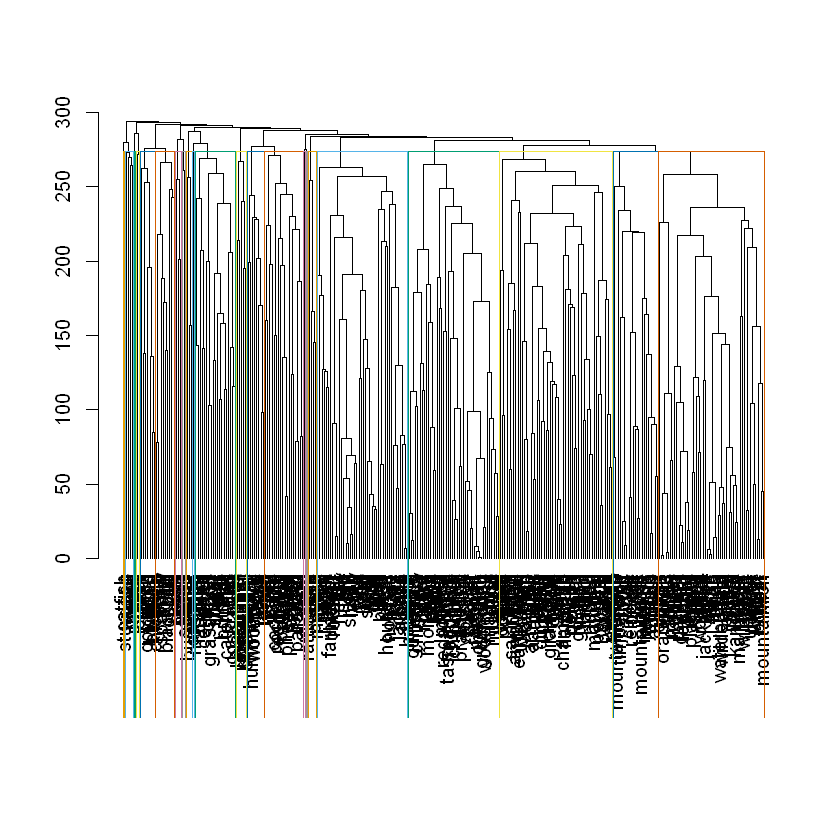

In [26]:
# Let's look at the communities with a dendogram 
dendPlot(clp, mode="hclust")

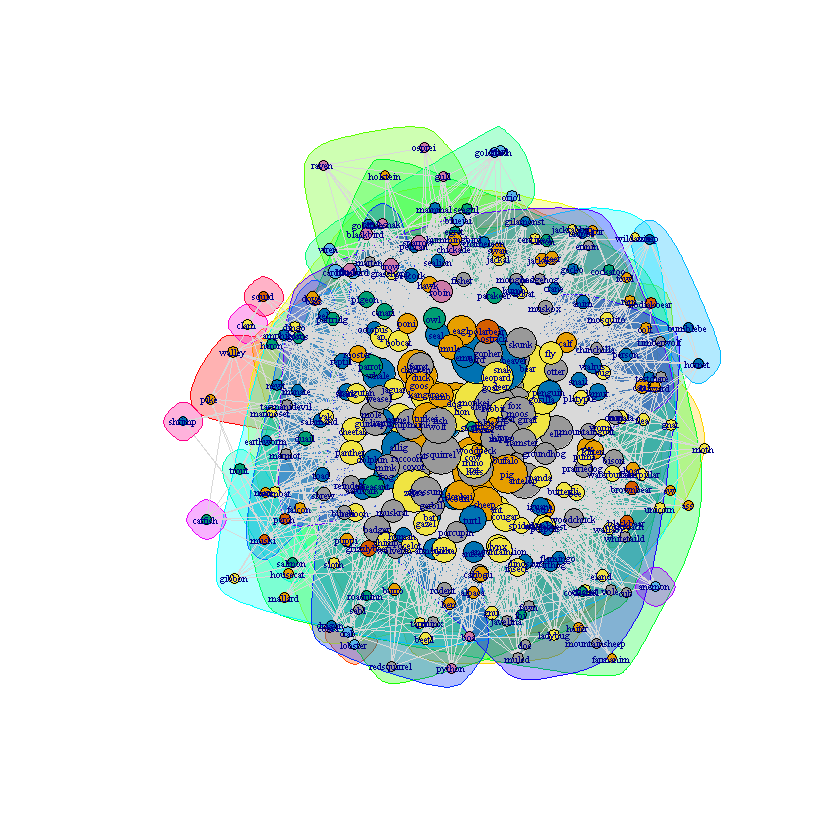

In [88]:
# We can plot using the results obtained from the algorithm
# Igraph has built-in functions to plot this
#plot(clp, net, layout=layout_with_kk)
# But warning: PANDEMONIUM!
plot(clp, net.s, vertex.label.cex=0.5, edge.arrow.size=0.1,  
     edge.color="gray85",layout=layout_with_kk) 

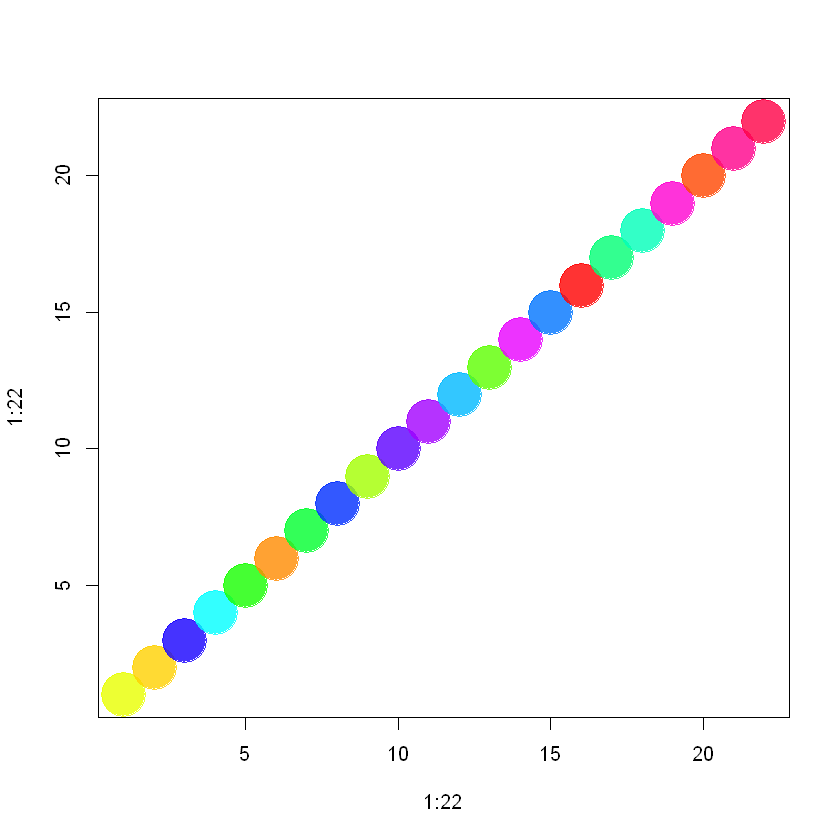

In [28]:
# Lets create a color pallet for the 22 communities
prettyColors <- rainbow(22, alpha = 0.8)
communityColors <- prettyColors[membership(clp)]
plot(x=1:22, y=1:22, pch=19, cex=5, col=unique(communityColors))

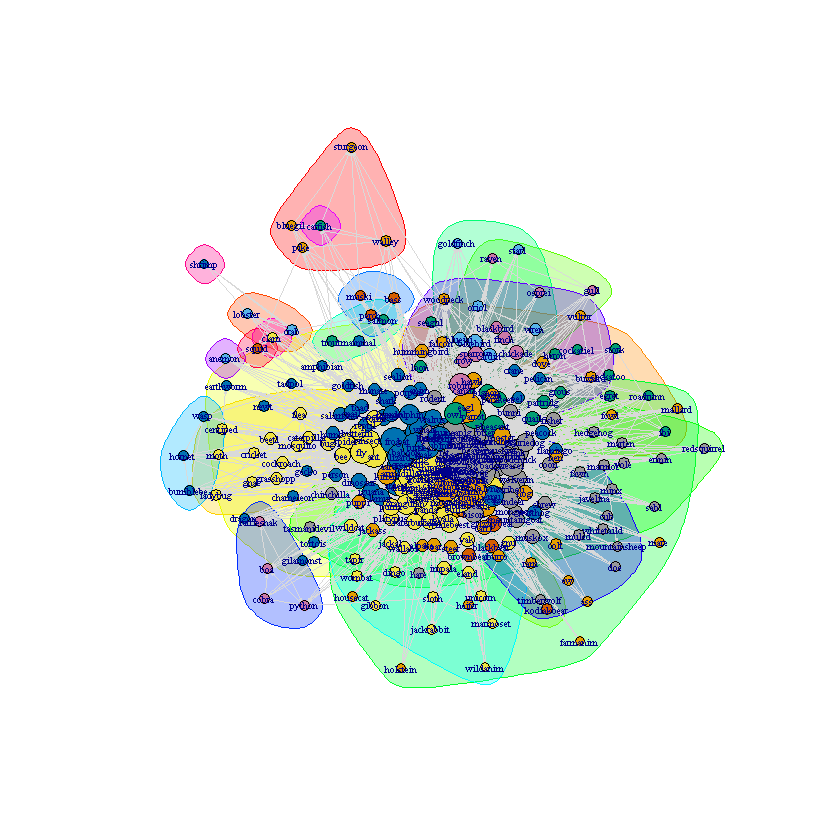

In [89]:
# Now we can  plot the communities without relying on their built-in plot:
plot(clp, net.s, vertex.color=communityColors,vertex.label.cex=0.5,
     edge.arrow.size=0.1, edge.color="gray85",layout=layout_with_fr) 

In [69]:
# Function to group communities in the graph 
# Use:
# - put your community object in the community slot
# - put your graph in the network slot
# Mpre info: https://stackoverflow.com/questions/16390221/how-to-make-grouped-layout-in-igraph
edge.weights <- function(community, network, weight.within = 100, weight.between = 1) {
bridges <- crossing(communities = community, graph = network)
weights <- ifelse(test = bridges, yes = weight.between, no = weight.within)
return(weights) 
}

In [90]:
# Then transfer the weights to the weight slot in the nodes:
net.graph <- net.s
E(net.graph)$weight <- edge.weights(clp, net.graph)

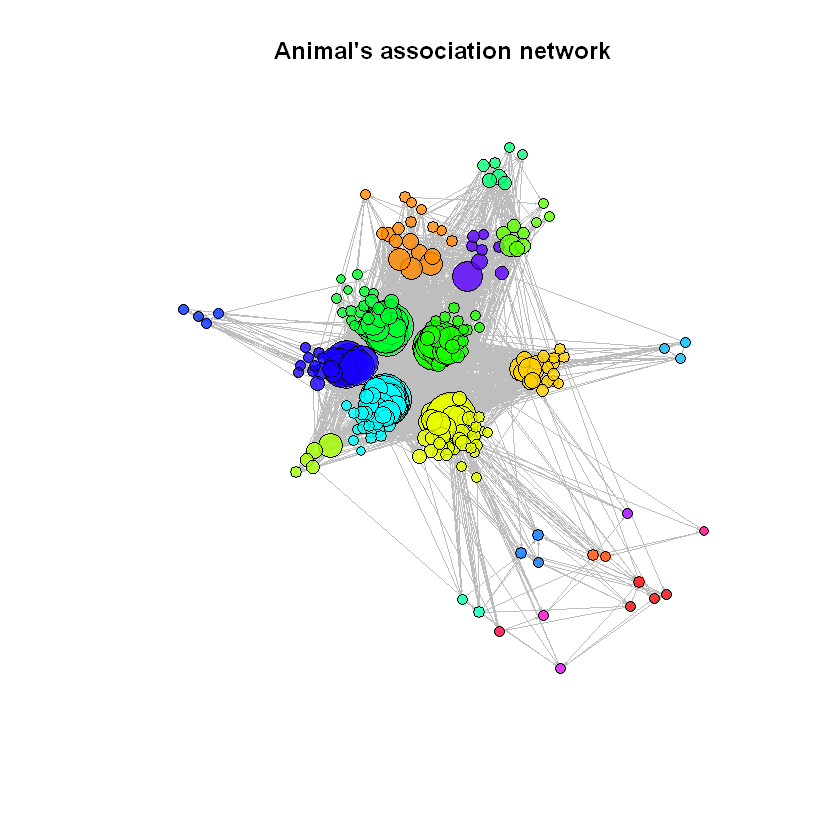

In [91]:
# Plot with no labels, clustered by community, and nodes scaled by weight 
set.seed(28) # set seed for reproducibility
plot(x = clp, y = net.graph, edge.width = 0.1, mark.groups = NULL, ylim= c(-1, 1), xlim=c(-1,1), 
     vertex.label = NA, edge.arrow.size=0.1, edge.color = "Grey", col = communityColors, 
     layout = layout_with_fr, main = "Animal's association network")

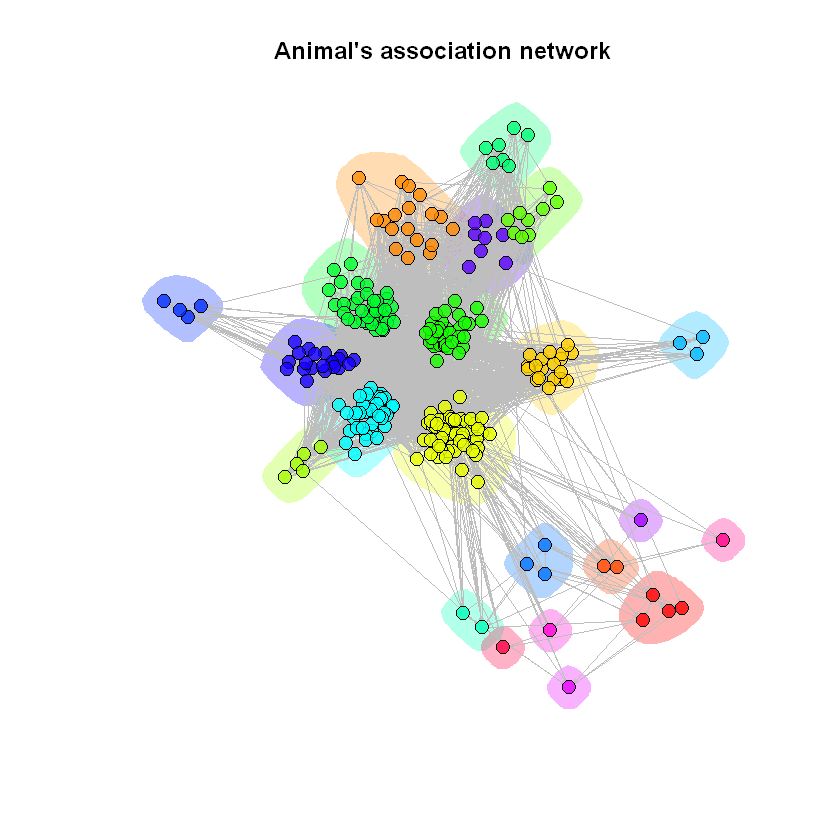

In [87]:
# Plot with no labels, clustered by community, and nodes at fix size
set.seed(28) # set seed for reproducibility
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, layout = layout_with_fr,  main = "Animal's association network")

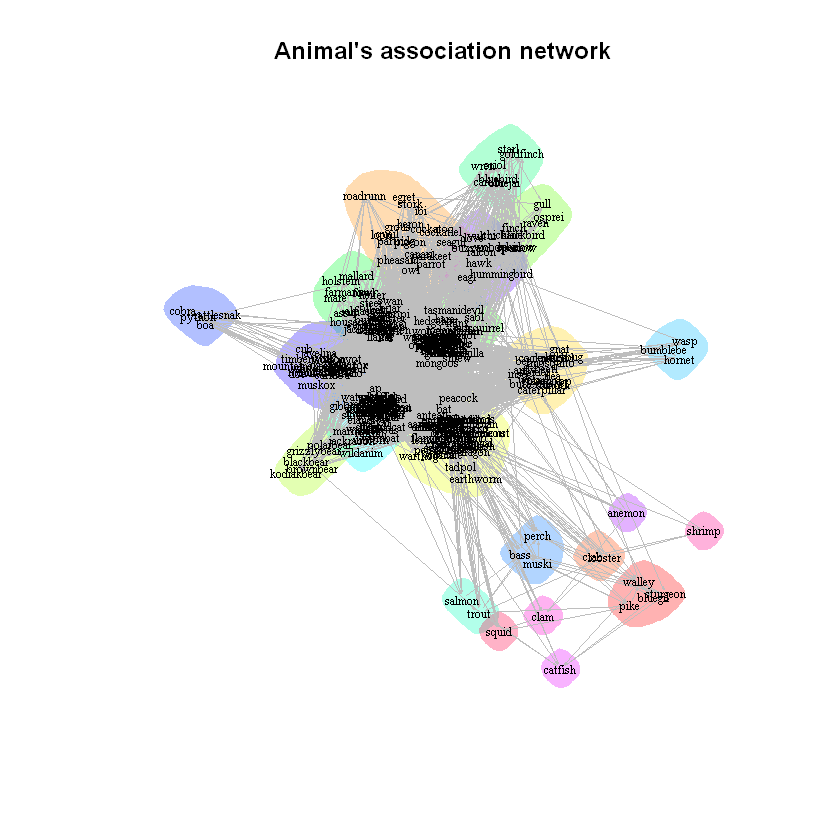

In [104]:
# Plot with labels, no shape,  clustered by community
set.seed(28) # set seed for reproducibility
plot(x = clp, y = net.graph, edge.width = 0.1, mark.border=NA, vertex.shape="none", vertex.label = V(net.graph)$name, 
     edge.arrow.size=0.1, vertex.label.font=1, edge.color = "Grey", vertex.label.color="black",
     vertex.label.cex=.6, col = communityColors, layout = layout_with_fr,  main = "Animal's association network")

#plot(net.s, vertex.shape="none", vertex.label=V(net)$name, 
#     vertex.label.font=2, vertex.label.color="blue",
#     vertex.label.cex=.5, edge.arrow.size=.1,
#     edge.color="gray85")

In [44]:
# Options to plot out the graph in high resolution: https://www.r-bloggers.com/high-resolution-figures-in-r/

# Export as high resolution tiff

# Plot with no labels, clustered by community, and nodes scaled by weight 
# Export as high resolution tiff

set.seed(28) # set seed for reproducibility
tiff("plot_weighted_nodes_white_b.tiff", width =5, height = 5, units = 'in', res = 300, compression = 'none')
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, edge.color = "Grey",
     col = communityColors, layout = layout_with_fr)
dev.off()

png 
  2

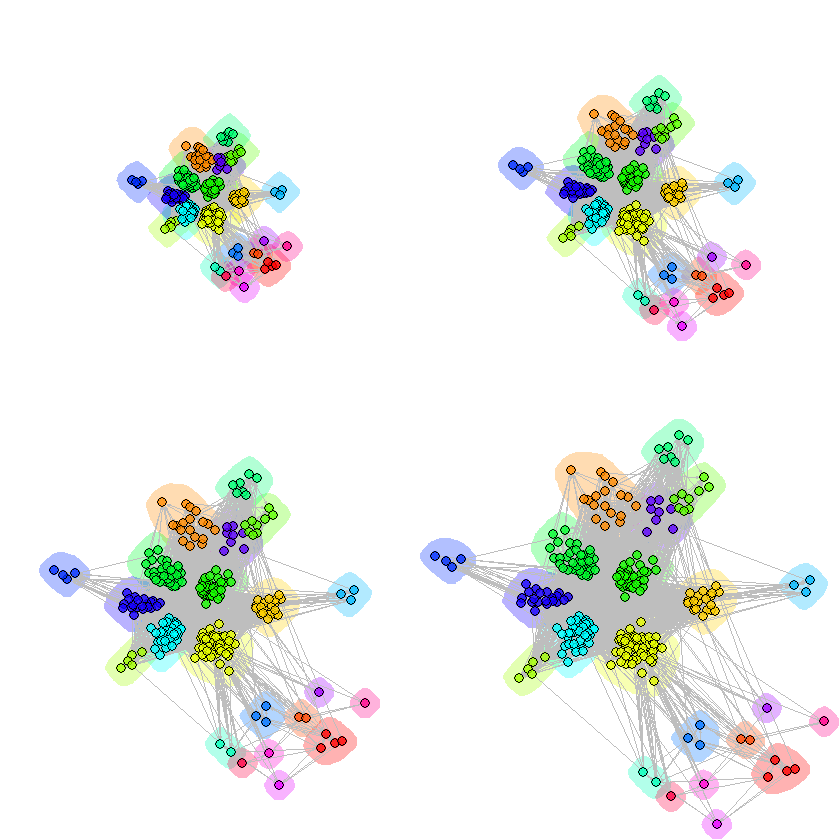

In [46]:
# Note about plot layout
# By default, the coordinates of the plots are rescaled to the [-1,1] interval for both x and y. 
# We can change that with the parameter rescale=FALSE and rescale the plot manually by multiplying 
# the coordinates by a scalar. You can use norm_coords to normalize the plot with the boundaries we want.

l <- layout_with_fr(net.graph)

l <- norm_coords(l, ymin=-1, ymax=1, xmin=-1, xmax=1)

par(mfrow=c(2,2), mar=c(0,0,0,0))

set.seed(28) # set seed for reproducibility
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, rescale=F, layout = l*0.4)
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, rescale=F, layout = l*0.6)
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, rescale=F, layout = l*0.8)
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, rescale=F, layout = l*1.0)

In [107]:
# Let's extract the first animal from each cluster to use it as label for the group
names = c()
for (i in 1:22) {
    names[[i]] <- paste(clp[[i]][1], ", n = ",sizes(clp)[[i]][1], sep = "")
    # append to list <- first animal in the cluster + number of animals in the cluster
}
names
class(names)

[1] "pike, n = 4"      "crab, n = 2"      "canari, n = 18"   "ant, n = 19"     
 [5] "aardvark, n = 52" "polarbear, n = 5" "chickade, n = 9"  "badger, n = 42"  
 [9] "cat, n = 42"      "bluebird, n = 7"  "trout, n = 2"     "baboon, n = 49"  
[13] "wasp, n = 3"      "bass, n = 3"      "boa, n = 4"       "antelop, n = 21" 
[17] "eagl, n = 8"      "anemon, n = 1"    "catfish, n = 1"   "clam, n = 1"     
[21] "shrimp, n = 1"    "squid, n = 1"

[1] "character"

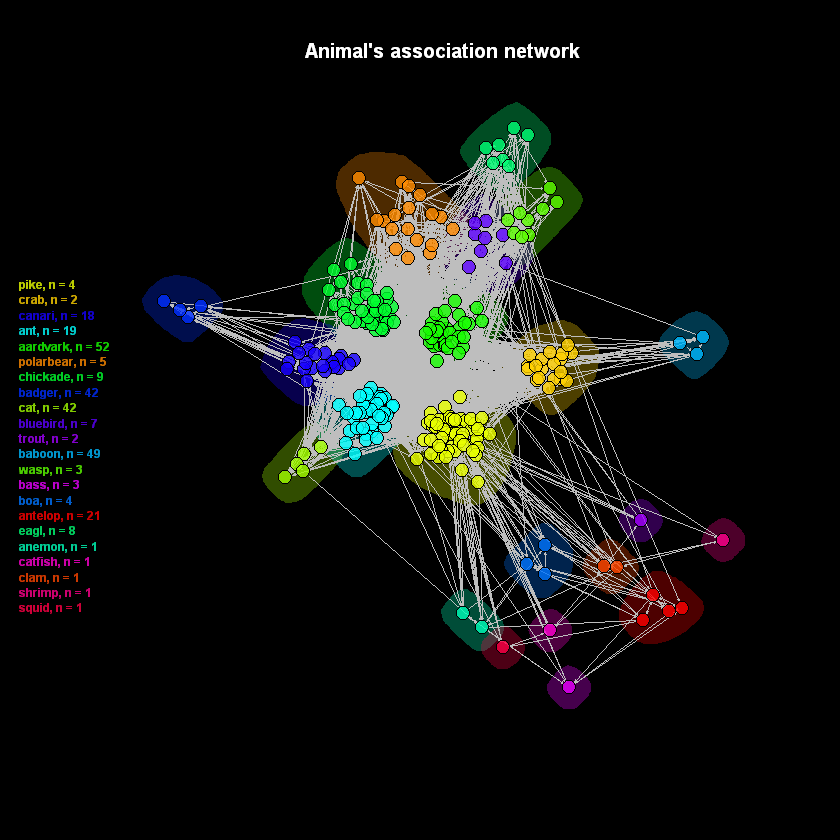

In [116]:
# GRAPH 1
# Let's add leyends to the groups by picking the first animal on each cluster
# Plot with no labels, clustered by community, and nodes at fix size

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, 
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.6 , y = 0.5, legend=levels(factor(names, levels=names)), 
       pt.bg=unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)

In [110]:
# Let's plot out graph 1
tiff("plot_unweighted_nodes_black_b.tiff", width =6, height = 5, units = 'in', res = 300, compression = 'none')

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, 
     vertex.label = NA, edge.arrow.size=0.1, vertex.size = 5, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.8 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)

dev.off()

png 
  2

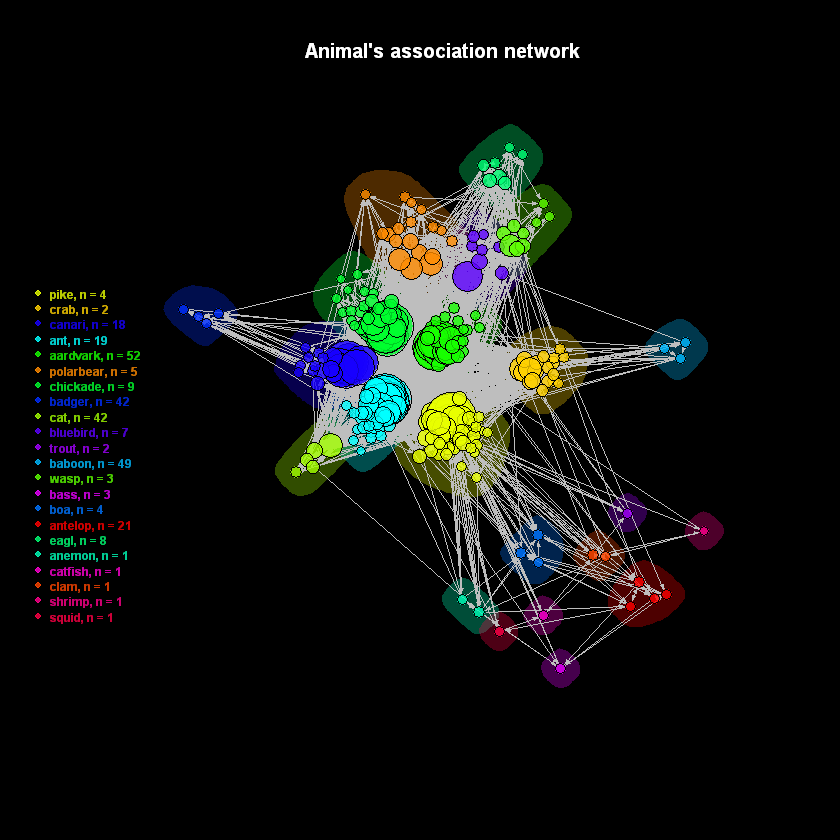

In [115]:
# GRAPH 2
# Let's add leyends to the groups by picking the first animal on each cluster
# Plot with no labels, clustered by community, and nodes scaled by weight (n# of links)
set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, 
     vertex.label = NA, edge.arrow.size=0.2, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.6 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)

In [112]:
# Let's plot out graph 2
tiff("plot_weighted_nodes_black_b.tiff", width =6, height = 5, units = 'in', res = 300, compression = 'none')

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, 
     vertex.label = NA, edge.arrow.size=0.1, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.8 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)
dev.off()

png 
  2

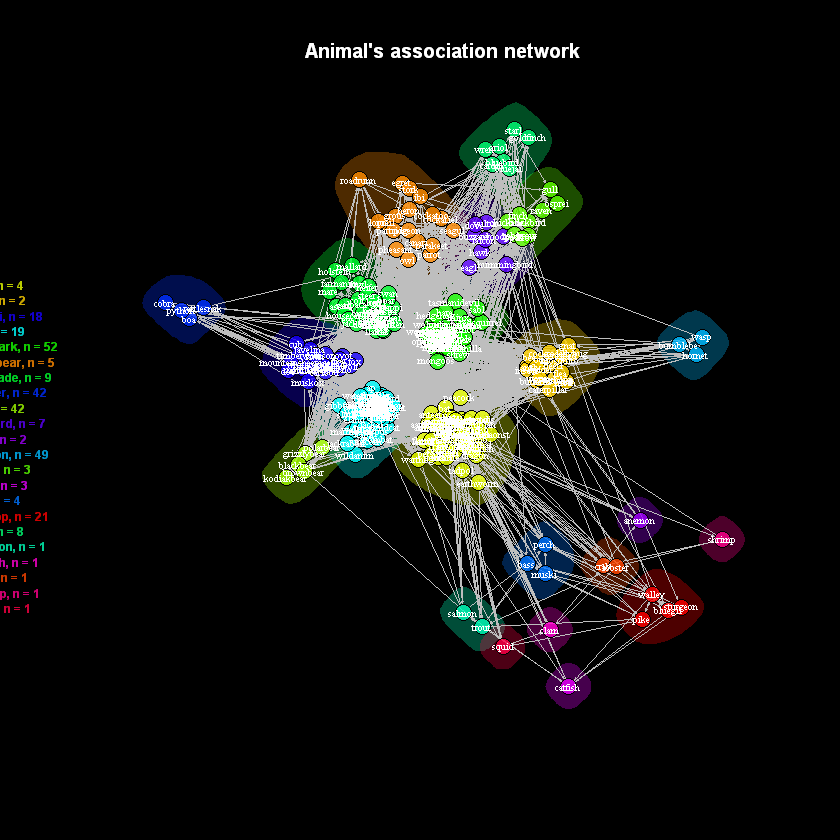

In [113]:
# GRAPH 3
# Let's add leyends to the groups by picking the first animal on each cluster
# Plot with labels, clustered by community, and nodes at fix size
set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,  vertex.label.cex=0.5, 
      vertex.label.color="white", edge.arrow.size=0.1, vertex.size = 6, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1,col = "white", font = 2))

legend(x =-1.8 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)

In [118]:
# Let's plot out GRAPH 3
tiff("plot_unweighted_nodes__black_b_leg.tiff", width =6, height = 5, units = 'in', res = 300, compression = 'none')

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA,  vertex.label.cex=0.5, 
      vertex.label.color="white", edge.arrow.size=0.1, vertex.size = 6, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.8 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)
dev.off()

png 
  2

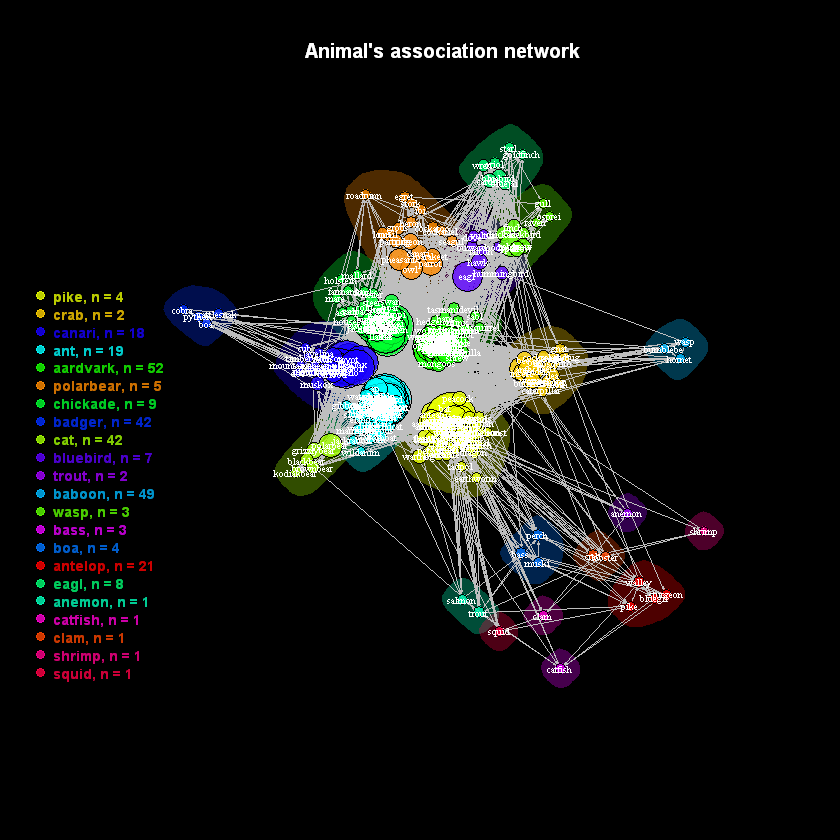

In [119]:
# GRAPH 4
# Let's add leyends to the groups by picking the first animal on each cluster
# Plot with labels, clustered by community, and nodes scaled by weight (n# of links)

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black
plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, vertex.label.cex=0.5, 
      vertex.label.color="white", edge.arrow.size=0.1, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.6 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.5, cex = 0.7, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)

In [120]:
# Let's plot out GRAPH 4
tiff("plot_weighted_nodes__black_b_leg.tiff", width =6, height = 5, units = 'in', res = 300, compression = 'none')

set.seed(28) # set seed for reproducibility
par(bg="black") # set background to black

plot(x = clp, y = net.graph, edge.width = 0.1,  mark.border=NA, vertex.label.cex=0.5, 
      vertex.label.color="white", edge.arrow.size=0.1, edge.color = "Grey",
     col = communityColors, layout=layout_with_fr)

title(main = list("Animal's association network", cex = 1, col = "white", font = 2))

legend(x =-1.8 , y = 0.5, legend=levels(factor(names, levels=names)),
       col = unique(communityColors), bty = "n", pch=20 , pt.cex = 1.0, cex = 0.6, 
       text.col=unique(communityColors), horiz = FALSE, inset = c(0.1, 0.1), text.font =2)
dev.off()

png 
  2

# Network and node descriptives  
- Density: The proportion of present edges from all possible edges in the network.
- Reciprocity: The proportion of reciprocated ties (for a directed network)
- Transitivity: 
    - global: ratio of triangles (direction disregarded) to connected triples.
    - local: ratio of triangles to connected triples each vertex is part of.
- Diameter: A network diameter is the longest geodesic distance (length of the shortest path between two nodes) in the network. In igraph,  diameter() returns the distance, while get_diameter() returns the nodes along the first found path of that distance.
- Degree: The degree of a node is the number of edges connected to the node. The function degree() has a mode of in for in-degree, out for out-degree, and all or total for total degree.
- Closeness: (centrality based on distance to others in the graph). Inverse of the node’s average geodesic distance to others in the network.
- Eigenvector: (centrality proportional to the sum of connection centralities). Values of the first eigenvector of the graph matrix.
- Betweenness: centrality based on a broker position connecting others). Number of geodesics that pass through the node or the edge.


In [122]:
# Density
# The proportion of present edges from all possible edges in the network.

print("Density: ")
edge_density(net, loops=F)

[1] "Density: "


[1] 0.1131904

In [123]:
ecount(net.graph)/(vcount(net.graph)*(vcount(net.graph)-1)) #for a directed network

[1] 0.1129367

In [125]:
# Reciprocity
reciprocity(net)

dyad_census(net) # Mutual, asymmetric, and nyll node pairs

2*dyad_census(net)$mut/ecount(net) # Calculating reciprocity

[1] 0.5482389

$mut
[1] 2696

$asym
[1] 4425

$null
[1] 36244

[1] 0.5492513

In [127]:
# Transitivity
transitivity(net, type="global")  # net is treated as an undirected network

transitivity(as.undirected(net, mode="collapse")) # same as above

head(transitivity(net, type="local")) # just first 10

triad_census(net) # for directed networks 

[1] 0.4840822

[1] 0.4840822

[1] 0.4110208 0.2013949 0.2790659 0.3726402 0.2049941 0.3367617

[1] 2666269  763650  390145   28979   33644   60313   83030   72262    8167
[10]    2613   38090    9186    7691   16329   32959   21988

In [129]:
# Diamter
diameter(net, directed=T, weights=NA)
diam <- get_diameter(net, directed=T)

diam

[1] 4

+ 5/295 vertices, named, from 4bbc365:
[1] sturgeon    bass        snak        chipmunk    redsquirrel

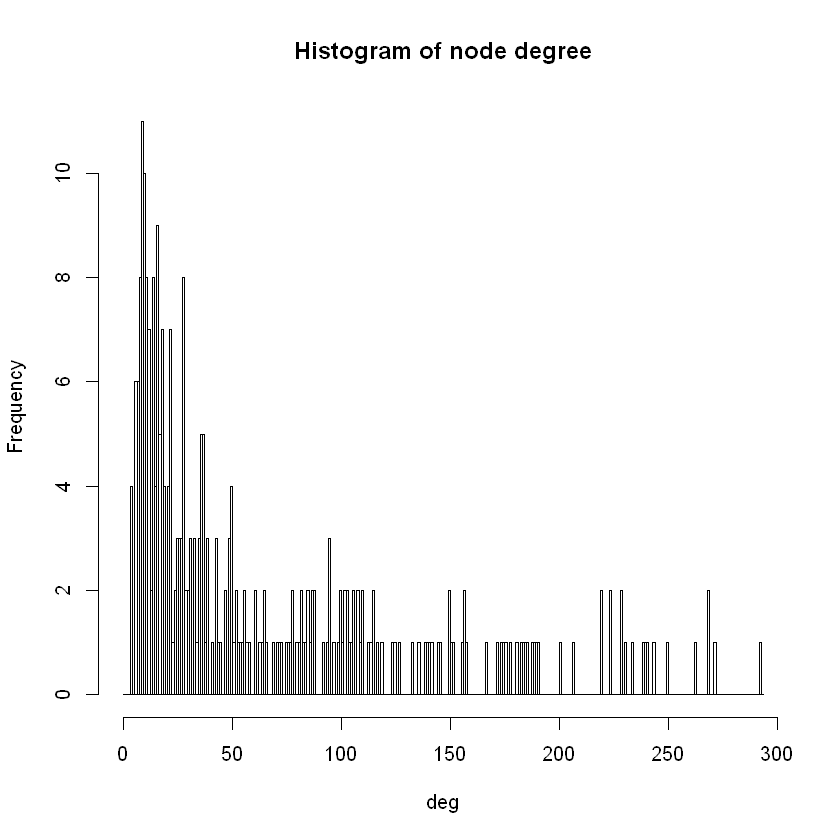

In [132]:
# Node degrees
deg <- degree(net, mode="all")

hist(deg, breaks=1:vcount(net)-1, main="Histogram of node degree")

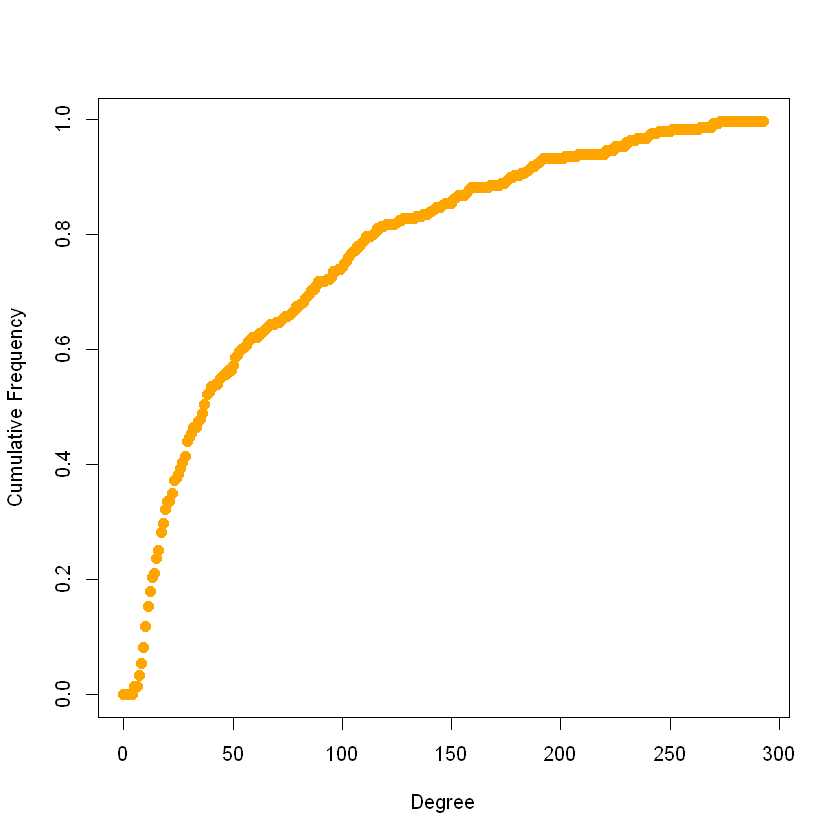

In [133]:
# Degree distribution
deg.dist <- degree_distribution(net, cumulative=T, mode="all")

plot( x=0:max(deg), y=1-deg.dist, pch=19, cex=1.2, col="orange", 

      xlab="Degree", ylab="Cumulative Frequency")

In [137]:
# Links coming in

#degree(net, mode="in")
#centr_degree(net, mode="in", normalized=T) 

# This will yield a super long list

In [138]:
# Closeness

# closeness(net, mode="all", weights=NA) 
# centr_clo(net, mode="all", normalized=T) 

# This will yield a super long list

In [140]:
# Eigenvector

#eigen_centrality(net, directed=T, weights=NA)

#centr_eigen(net, directed=T, normalized=T) 

#This will yield a super long list

In [141]:
# Betweenness 

#betweenness(net, directed=T, weights=NA)

#edge_betweenness(net, directed=T, weights=NA)

#centr_betw(net, directed=T, normalized=T)

#This will yield a super long list

aardvark         allig           ant        anteat       antelop 
 6.389300e+01  1.306308e+03  7.474716e+02  8.414831e+01  1.037548e+03 
    armadillo        baboon        badger           bat          bear 
 1.617561e+02  3.825931e+02  2.328655e+02  2.027099e+02  3.671625e+03 
       beaver       buffalo         camel        canari           cat 
 3.131185e+02  1.089564e+03  4.008793e+02  1.220723e+02  1.593856e+03 
      cheetah       chicken      chipmunk           cow         coyot 
 1.701123e+02  1.177029e+03  9.192140e+02  1.969326e+03  7.759781e+02 
     crocodil          deer           dog         eleph           elk 
 3.213202e+02  2.556073e+03  2.009330e+03  2.725286e+03  8.216263e+02 
         fish           fox          frog          goat          hors 
 4.090490e+03  1.000771e+03  8.022359e+02  1.300883e+03  3.055768e+03 
     kangaroo          lion         llama        monkei       octopus 
 9.388750e+02  1.539652e+03  6.227511e+02  1.675940e+03  1.526750e+02 
      ostrich        rabbit       raccoon         sheep          snak 
 2.671566e+02  1.949726e+03  1.084889e+03  1.200052e+03  3.443396e+03 
        tiger        turkei         whale         zebra          bird 
 1.532563e+03  7.450480e+02  1.625914e+03  1.814028e+03  5.402693e+03 
          boa          bull     chameleon         chimp        cougar 
 2.415692e+01  1.439278e+02  1.091583e+01  1.117293e+02  5.411136e+02 
      cricket      dinosaur       dolphin        donkei          duck 
 2.236462e+01  3.061990e+01  2.215546e+02  6.960308e+02  7.330740e+02 
          eel         egret        ferret        gerbil        giraff 
 1.244930e+01  2.936407e+01  2.789826e+02  2.483397e+02  1.859994e+03 
         goos        gopher       gorilla         hippo         hyena 
 8.326293e+02  5.238489e+02  4.435352e+02  8.303468e+02  3.406038e+02 
       iguana        insect         koala       ladybug       leopard 
 1.802805e+02  2.550167e+02  1.838498e+02  8.363180e+00  6.371873e+02 
       lizard          lynx        mammal          mink          moos 
 5.385287e+02  1.568612e+02  2.076414e+01  5.474127e+02  1.004181e+03 
     mosquito          mous       opossum         otter            ox 
 1.575469e+02  1.596263e+03  5.340741e+02  1.621275e+02  1.725823e+02 
        panda        parrot           pig     polarbear         puppi 
 1.019206e+02  3.779806e+02  9.741319e+02  2.343244e+02  2.061080e+00 
          rat        reptil         rhino        rodent         shark 
 1.107485e+03  4.712097e+01  6.958902e+02  1.052034e+01  5.600596e+02 
       spider      squirrel          toad         turtl       wildcat 
 1.545850e+02  1.854424e+03  1.600433e+02  4.429153e+02  1.191842e+01 
   wildebeest          wolf      wolverin        alpaca          eagl 
 3.799891e+01  9.590500e+02  5.057651e+01  2.919015e+01  1.857846e+03 
     holstein     amphibian         human       mongoos      woodpeck 
 2.036060e-01  7.069346e+00  8.615486e+01  4.095173e+01  1.195576e+01 
       anemon          anim         bison         lemur        tadpol 
 6.477749e+00  1.753231e+01  8.050468e+01  5.979506e+01  1.085683e+00 
           ap           bee         beetl        bobcat           bug 
 2.813558e+02  4.310565e+02  2.713031e+01  1.115298e+02  6.317958e+01 
         calf      centiped     cockroach           fly     grasshopp 
 1.145292e+02  1.326669e+01  2.031648e+01  6.442803e+02  1.192055e+01 
         moth  mountainlion          wasp         gazel        jaguar 
 6.838001e+00  4.478175e+02  3.027368e+01  3.776624e+02  1.095395e+02 
         mole       muskrat     orangutan      platypus    prairiedog 
 1.957022e+02  1.468555e+02  1.540979e+02  6.410814e+01  7.082716e+01 
         seal         skunk         tapir       caribou      chickade 
 4.534631e+02  5.718326e+02  5.360530e+00  5.731353e+01  1.607306e+02 
   chinchilla         eland           gnu   grizzlybear       hamster 
 1.903238e+01  2.084305e+00  2.033242e+01  6.700244e+01  2.772914e+02 
          hog          humb  

[1]   7.470806   8.192663   4.552950   7.968450   4.892951   7.194648
   [7]   4.509166   4.886857  15.120966   5.085276   9.049506   5.336961
  [13]  10.459799  10.793776   5.142722   8.411508   9.433760   8.568352
  [19]   8.769959   6.803096  11.499972   7.461096  10.625023   8.221610
  [25]  20.128458   7.218268   7.797811   9.839769   8.976357   6.245062
  [31]   8.507495   6.279914   9.760257   6.508259   5.125272   9.449180
  [37]   5.575462   7.110662  12.808917   8.402480   9.152712  11.236162
  [43]   7.318629  10.322931  13.733822  12.804433  11.919415  22.442175
  [49]  12.798084  19.992595   9.118406  23.344755 108.037398  16.100276
  [55]  13.037490   8.492740  12.900588  38.853566  10.331195  11.887173
  [61]  14.155780  10.126700   9.740203  13.383237  57.896216  11.431289
  [67]  14.810119  15.618777   8.365116  15.480109  13.081051  10.855155
  [73]  30.013845  52.301807  11.971946   9.160601  23.174588  10.292014
  [79]   9.960420   9.253661  10.089543  14.969843   9.979714  10.218252
  [85]  10.653677   9.463155  13.722577  14.108369  14.028544  11.414663
  [91] 121.350644   9.696115   9.249636  11.089463  11.167067  56.373625
  [97]  15.514904  11.764833  11.935444  48.673999  11.321738  16.178956
 [103]  10.128076  12.285092   9.984014  12.203235  11.176039  16.851798
 [109]   8.014324   8.686990  23.448748   9.814005   8.769550   9.752777
 [115]  18.818557   8.633300  16.439282  32.195500  11.562212  12.941628
 [121]  26.667637  11.272187   9.511710  26.336308  13.637963   9.027790
 [127]  16.628363  37.005977  15.438069   9.000930  16.306069   7.615130
 [133]  14.573445  14.320403  20.473355  14.744205  27.806246  19.119689
 [139]  28.123986  22.485201  27.714412  16.034188  22.214902  15.258999
 [145]   8.342411  19.053064  16.885772  36.039875  53.097567  34.521874
 [151]  14.430340  11.960881   9.143924  81.902051  11.851406  13.455282
 [157]  70.706023  87.569002  46.617939 166.290808  51.192444  10.180242
 [163]  22.125580  18.462411  18.588457   6.154925   7.822976  22.096648
 [169]  24.332778  35.347827  14.523370  28.682844  25.320581  26.701222
 [175]   7.855973  11.215947  11.359299  15.364218   8.672896  10.652842
 [181]   9.392974  10.405471  26.334807  14.331441  29.732168  32.285083
 [187]  11.569308  10.673588  11.813143  19.095180  65.317039  23.793809
 [193]  16.442498  29.395659  10.946689  20.087587  11.910587  17.186430
 [199]  27.669937  17.832336   7.874600   9.342976  10.146007  13.018340
 [205]  30.953401  12.379989   8.134233  64.725513  12.962451  13.940478
 [211]  13.636002  10.886465  18.074113 134.532922  16.920418  12.700060
 [217]  10.210160  11.760361  15.421926  11.413023  11.136992  13.999196
 [223]  18.783652  15.565431  61.615958   3.392755   6.964412   4.551163
 [229]   6.449442  14.374254   9.777560  25.029742   8.735260  11.689355
 [235]   8.432988  16.935521   4.503496   7.911583   5.300092   7.658082
 [241]   7.478543   9.456583   7.825001   5.874278   8.067951   6.598628
 [247]   6.815957   8.335488   5.974211   4.269184   5.306107   3.820660
 [253]   6.966147   7.227469   6.310702   9.319759   7.642432   4.644047
 [259]   5.186003   5.725079   6.088444   6.152934   5.458230   9.521880
 [265]   5.313753   4.391127   4.991714  11.293657   8.104382  13.203197
 [271]   5.530129  11.297304   5.878514   6.373109   8.421471  10.834076
 [277] 194.207543   9.460588   7.375315  22.313611   6.370470  13.656441
 [283]  27.390284  11.561361   8.269535   9.551369   9.363824   6.162213
 [289]  11.373359  11.414054   7.971499  36.947786   7.817708  25.735817
 [295]  11.860493   5.836684   9.173493   9.078647   9.735719   7.743748
 [301]   7.768588   9.651556   9.046309  21.975623  33.419294  10.232489
 [307]   5.997743   8.187264   7.836825   9.949468   6.513082  24.023837
 [313]   9.459931   7.843209   8.133272  21.958871   8.556597   6.968212
 [319]  11.115411   6.706674  24.282434  10.452668  22.067844   8.287523
 [325]  31.586084   7.415388   8.266451   8.743057   9.086035

$res
  [1] 6.389300e+01 1.306308e+03 7.474716e+02 8.414831e+01 1.037548e+03
  [6] 1.617561e+02 3.825931e+02 2.328655e+02 2.027099e+02 3.671625e+03
 [11] 3.131185e+02 1.089564e+03 4.008793e+02 1.220723e+02 1.593856e+03
 [16] 1.701123e+02 1.177029e+03 9.192140e+02 1.969326e+03 7.759781e+02
 [21] 3.213202e+02 2.556073e+03 2.009330e+03 2.725286e+03 8.216263e+02
 [26] 4.090490e+03 1.000771e+03 8.022359e+02 1.300883e+03 3.055768e+03
 [31] 9.388750e+02 1.539652e+03 6.227511e+02 1.675940e+03 1.526750e+02
 [36] 2.671566e+02 1.949726e+03 1.084889e+03 1.200052e+03 3.443396e+03
 [41] 1.532563e+03 7.450480e+02 1.625914e+03 1.814028e+03 5.402693e+03
 [46] 2.415692e+01 1.439278e+02 1.091583e+01 1.117293e+02 5.411136e+02
 [51] 2.236462e+01 3.061990e+01 2.215546e+02 6.960308e+02 7.330740e+02
 [56] 1.244930e+01 2.936407e+01 2.789826e+02 2.483397e+02 1.859994e+03
 [61] 8.326293e+02 5.238489e+02 4.435352e+02 8.303468e+02 3.406038e+02
 [66] 1.802805e+02 2.550167e+02 1.838498e+02 8.363180e+00 6.371873e+02
 [71] 5.385287e+02 1.568612e+02 2.076414e+01 5.474127e+02 1.004181e+03
 [76] 1.575469e+02 1.596263e+03 5.340741e+02 1.621275e+02 1.725823e+02
 [81] 1.019206e+02 3.779806e+02 9.741319e+02 2.343244e+02 2.061080e+00
 [86] 1.107485e+03 4.712097e+01 6.958902e+02 1.052034e+01 5.600596e+02
 [91] 1.545850e+02 1.854424e+03 1.600433e+02 4.429153e+02 1.191842e+01
 [96] 3.799891e+01 9.590500e+02 5.057651e+01 2.919015e+01 1.857846e+03
[101] 2.036060e-01 7.069346e+00 8.615486e+01 4.095173e+01 1.195576e+01
[106] 6.477749e+00 1.753231e+01 8.050468e+01 5.979506e+01 1.085683e+00
[111] 2.813558e+02 4.310565e+02 2.713031e+01 1.115298e+02 6.317958e+01
[116] 1.145292e+02 1.326669e+01 2.031648e+01 6.442803e+02 1.192055e+01
[121] 6.838001e+00 4.478175e+02 3.027368e+01 3.776624e+02 1.095395e+02
[126] 1.957022e+02 1.468555e+02 1.540979e+02 6.410814e+01 7.082716e+01
[131] 4.534631e+02 5.718326e+02 5.360530e+00 5.731353e+01 1.607306e+02
[136] 1.903238e+01 2.084305e+00 2.033242e+01 6.700244e+01 2.772914e+02
[141] 1.377009e+01 6.441691e+00 2.210384e+01 1.290012e+01 1.541113e+02
[146] 1.707594e+02 4.170582e+02 3.150562e+00 7.153032e+00 1.051904e+02
[151] 8.398716e+01 1.554715e+00 4.057667e+01 4.335344e+01 4.156334e+00
[156] 2.443493e+01 1.637554e+02 1.077363e+01 6.097459e+00 1.641424e+01
[161] 2.285222e+02 5.832386e+00 5.045331e-01 1.270152e+01 3.155062e+01
[166] 4.110194e+01 1.807020e+02 1.119539e+00 3.978315e+01 3.705117e+00
[171] 3.473659e+02 3.220872e+01 3.078249e+02 7.108848e+01 2.215976e+01
[176] 2.227284e+00 3.249464e+02 1.603473e+02 7.828701e+02 2.011185e+01
[181] 1.100327e+01 4.338781e+01 3.474677e+01 1.587221e+02 3.788235e+01
[186] 2.197887e+01 7.844789e+00 1.559205e-01 2.315463e+02 6.474443e+01
[191] 1.792398e+00 1.700622e+01 1.200011e+01 2.019828e+00 3.373965e+02
[196] 6.992954e+01 1.086449e+02 1.737056e+02 1.640891e+01 2.478584e+02
[201] 1.230036e+02 8.475344e+01 3.051106e-02 1.709665e+02 3.703328e+01
[206] 2.683144e+02 2.282828e+01 2.061199e+02 7.420628e+01 9.425334e+01
[211] 2.035375e+00 3.074708e+02 1.100693e+01 6.461175e-02 7.980718e+00
[216] 1.659532e+01 2.464120e+01 4.581675e+00 1.357407e+01 2.479323e+01
[221] 1.325632e+01 9.510051e+01 2.725411e+01 6.238545e+00 1.712118e+02
[226] 4.905684e+02 1.649628e+01 3.883066e+00 4.033434e+00 0.000000e+00
[231] 1.000818e+01 4.063984e+01 1.596692e+01 3.274633e+00 1.563889e+01
[236] 3.198459e+01 1.018623e+01 3.711692e+00 1.722889e+02 9.169702e+00
[241] 2.336765e+00 5.975345e+01 1.004146e+01 6.870361e+00 0.000000e+00
[246] 3.391059e-01 2.825960e+01 2.518203e-01 3.389567e+01 9.148900e+00
[251] 3.938541e+00 4.221029e+00 3.014648e+00 1.785221e+01 3.329757e+00
[256] 7.540548e+01 9.237597e+00 3.066882e+00 4.519585e+00 5.756579e-02
[261] 3.231485e+01 1.498661e+00 4.024950e+00 2.078135e+01 2.420908e-01
[266] 4.494740e-01 9.528148e+00 7.768660e+01 5.358476e+00 4.318459e+00
[271] 1.616285e+00 5.658838e+00 1.592861e+01 1.039423e+01 1.294792e+01
[276] 2.398845e+01 8.756104e+01 4.842265e+00 1.024904e+01 1.380846e+01
[281] 3.125000e-02 